# Vehicle Counting with YOLOv3

### The final video showing the result can be found here: https://youtu.be/Dr_Ic6tZVjw

#### pre-trained weight file from `darknet`: https://pjreddie.com/darknet/yolo/

![weight files](images/wt-files.png)

In this project, I used the second one: `YOLOv3-416` model and `COCO` dataset. The evaluation metric: `mAP(mean Average Precision)` of this model is $55.3$

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### 1. load the YoloV3 weights and configuration file with the help of `dnn` module of OpenCV.

In [2]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [3]:
type(net)

cv2.dnn_Net

#### 2. `coco.names` file contains the names of the different objects that our model has been trained to identify. We store them in a list called classes.

In [4]:
classes = []
with open("coco.names", "r") as f:
    classes = f.read().splitlines()
print(f"Total: {len(classes)} classes and they are: \n{classes}")

Total: 80 classes and they are: 
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


#### store the required classes into a different list

In [5]:
myClass = ["car", "bus", "truck", "motorbike", "bicycle"]

#### 3. Now to run a forward pass using the `cv2.dnn` module, we need to pass in the names of layers for which the output is to be computed. `net.getUnconnectedOutLayers()` returns the indices of the output layers of the network.

In [6]:
output_layers_names = net.getUnconnectedOutLayersNames()
type(output_layers_names), len(output_layers_names)

(list, 3)

In [7]:
output_layers_names

['yolo_82', 'yolo_94', 'yolo_106']

##### Note:

`YOLOv3` has total 106 layers. The above layers are responsible for object detection.

75 cnn-layers (convolutional layers) + 31 other layers (shortcut, route, upsample, yolo) = 106 layers in total.

In [8]:
all_layers = net.getLayerNames()
print(len(all_layers), all_layers)

254 ['conv_0', 'bn_0', 'relu_1', 'conv_1', 'bn_1', 'relu_2', 'conv_2', 'bn_2', 'relu_3', 'conv_3', 'bn_3', 'relu_4', 'shortcut_4', 'conv_5', 'bn_5', 'relu_6', 'conv_6', 'bn_6', 'relu_7', 'conv_7', 'bn_7', 'relu_8', 'shortcut_8', 'conv_9', 'bn_9', 'relu_10', 'conv_10', 'bn_10', 'relu_11', 'shortcut_11', 'conv_12', 'bn_12', 'relu_13', 'conv_13', 'bn_13', 'relu_14', 'conv_14', 'bn_14', 'relu_15', 'shortcut_15', 'conv_16', 'bn_16', 'relu_17', 'conv_17', 'bn_17', 'relu_18', 'shortcut_18', 'conv_19', 'bn_19', 'relu_20', 'conv_20', 'bn_20', 'relu_21', 'shortcut_21', 'conv_22', 'bn_22', 'relu_23', 'conv_23', 'bn_23', 'relu_24', 'shortcut_24', 'conv_25', 'bn_25', 'relu_26', 'conv_26', 'bn_26', 'relu_27', 'shortcut_27', 'conv_28', 'bn_28', 'relu_29', 'conv_29', 'bn_29', 'relu_30', 'shortcut_30', 'conv_31', 'bn_31', 'relu_32', 'conv_32', 'bn_32', 'relu_33', 'shortcut_33', 'conv_34', 'bn_34', 'relu_35', 'conv_35', 'bn_35', 'relu_36', 'shortcut_36', 'conv_37', 'bn_37', 'relu_38', 'conv_38', 'bn_38'

In [9]:
cnn_layers = [layer for layer in all_layers if "conv" in layer]
print(len(cnn_layers), cnn_layers)

75 ['conv_0', 'conv_1', 'conv_2', 'conv_3', 'conv_5', 'conv_6', 'conv_7', 'conv_9', 'conv_10', 'conv_12', 'conv_13', 'conv_14', 'conv_16', 'conv_17', 'conv_19', 'conv_20', 'conv_22', 'conv_23', 'conv_25', 'conv_26', 'conv_28', 'conv_29', 'conv_31', 'conv_32', 'conv_34', 'conv_35', 'conv_37', 'conv_38', 'conv_39', 'conv_41', 'conv_42', 'conv_44', 'conv_45', 'conv_47', 'conv_48', 'conv_50', 'conv_51', 'conv_53', 'conv_54', 'conv_56', 'conv_57', 'conv_59', 'conv_60', 'conv_62', 'conv_63', 'conv_64', 'conv_66', 'conv_67', 'conv_69', 'conv_70', 'conv_72', 'conv_73', 'conv_75', 'conv_76', 'conv_77', 'conv_78', 'conv_79', 'conv_80', 'conv_81', 'conv_84', 'conv_87', 'conv_88', 'conv_89', 'conv_90', 'conv_91', 'conv_92', 'conv_93', 'conv_96', 'conv_99', 'conv_100', 'conv_101', 'conv_102', 'conv_103', 'conv_104', 'conv_105']


#### 5. To correctly predict the objects with deep neural networks, we need to preprocess our data and `cv2.dnn` module provides us with two functions for this purpose: 
    1. blobFromImage and 
    2. blobFromImages. 
    
    These functions perform scaling, mean subtraction and channel swap which is optional. We will use `blobFromImage` in a function called detect_objects() that accepts image/frame from video or webcam stream, model and output layers as parameters.
    
The input to the network is a so-called blob object. 

The function `cv.dnn.blobFromImage(img, scale, size, mean)` transforms the image into a blob:

It has the following parameters:

- the image to transform
- the scale factor (1/255 to scale the pixel values to [0..1])
- the size, here a 416x416 square image
- the mean value (default=0)
- the option swapBR=True (since OpenCV uses BGR)

In [10]:
def preprocess(img):
    blob = cv2.dnn.blobFromImage(img, 
                                 scalefactor=1/255, 
                                 size=(416, 416), 
                                 mean=(0, 0, 0), 
                                 swapRB=True, 
                                 crop=False)
    
    net.setInput(blob)
    layerOutputs = net.forward(output_layers_names)
    
    return layerOutputs

- A blob is a 4D numpy array object (images, channels, width, height).
- The `forward()` function of `cv2.dnn` module returns a nested list containing information about all the detected objects which includes 
    - the x and y coordinates of the centre of the object detected, 
    - height and width of the bounding box, 
    - confidence and scores for all the classes of objects listed in `coco.names`. 

The class with the highest score is considered to be the predicted class.

The outputs object are vectors of lenght 85
- 4x the bounding box (centerX, centerY, width, height)
- 1x box confidence
- 80x class confidence

#### detect objects and store them

In [13]:
def detect_objects(layerOutputs, height, width):

    boxes, confidences, class_ids = [], [], []

    for output in layerOutputs:
            for detection in output:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:
                    center_x = int(detection[0]*width)
                    center_y = int(detection[1]*height)
                    w = int(detection[2]*width)
                    h = int(detection[3]*height)

                    x = int(center_x - w/2)
                    y = int(center_y - h/2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)
                    
    return boxes, confidences, class_ids

#### coloring top

In [17]:
def top_color(width, img, font):
    img[0:100, 0:width] = [0,0,255]
    cv2.putText(img,'VEHICLE COUNT:',(10,60),font,2.5,(0,0,0),3)
    cv2.putText(img,'Downward:',(500,60),font,2.5,(0,0,0),3)
    cv2.putText(img,'Upward:',(1600,60),font,2.5,(0,0,0),3)

#### draw line as lane divider

In [14]:
def lane_divider(img):
    cv2.line(img, (350, 900), (1010, 900), (0, 255, 255), 3)
    cv2.line(img, (1100, 800), (1650, 800), (0, 255, 255), 3)

#### vehicle count

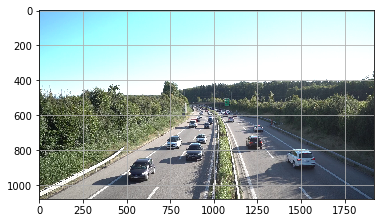

In [26]:
cap = cv2.VideoCapture("Highway.mp4")
success, img = cap.read()
cvtImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(cvtImg)
plt.grid(True, "major", axis="both")
plt.show()

countDown = 0
countUp = 0

while success:
    success, img = cap.read()
    height, width = img.shape[0:2]
    
    layerOutputs = preprocess(img)
    boxes, confidences, class_ids = detect_objects(layerOutputs, height, width)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size = (len(boxes), 3))
    
    top_color(width, img, font)
    lane_divider(img)

    if len(indexes) > 0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i], 2))
            color = colors[i]
            
            if label in myClass:
                rect = cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
                #center = cv2.circle(img, (int(x+w/2),int(y+h/2)), radius=2, color=(0, 0, 255), thickness=-1)
                rect[(y-15):(y+5), x:(x+w)] = color
                cv2.putText(img, label + " " + confidence, (x, y), font, 1.3, (0,0,0), 2)
            
                #logics for vehicle counting
                bikeC1y = int(y+h/2)        
                linC1y = 900
                bikeC2y = int(y+h/2)        
                linC2y = 800
                if(bikeC1y<linC1y+4 and bikeC1y>linC1y-4 and x <= 1010):
                    countDown = countDown+1
                    cv2.line(img, (350, 900), (1010, 900), (0,0,255), 3)
                if(bikeC2y<linC2y+4 and bikeC2y>linC2y-3 and x >= 1100):
                    countUp = countUp+1
                    cv2.line(img, (1100, 800), (1650, 800), (0,0,255), 3)
                cv2.putText(img, str(countDown), (760,60), font, 2.5, (0,0,0), 3)
                cv2.putText(img, str(countUp), (1800,60), font, 2.5, (0,0,0), 3)

    img = cv2.resize(img, (1300, 700))
    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
cap.release()        
cv2.destroyAllWindows()

#### IoU

For object detection, we use `IoU`(Intersection over Union)

if, A = ground truth bounding box and B = predicted bounding box then -

$IoU=\frac{A\cap{B}}{A\cup{B}}$

`IoU` tells us how well predicted and the ground truth bounding box overlap. We can define the `IoU` threshold(say 0.5) for classifying whether the prediction is a true positive or a false positive.
- **TP:** if $IoU > 0.5$
- **FP:** if $IoU < 0.5$
- **FN:** 
    - if there is no detection at all/missed the target
    - $IoU>0.5$ but wrong classification
    
#### `mAP` calculation from `AUC` of precision-recall

$precision = \frac{TP}{TP+FP}$

$recall = \frac{TP}{TP+FN}$

If we plot` precision vs recall`, we can calculate the AP: $AP = AUC$

Then, The $mAP$ for object detection is the average of the AP calculated for all the classes. But under the `COCO` context, there is no difference between `AP and mAP`. The quote from COCO:
> AP is averaged over all categories. Traditionally, this is called “mean average precision” (mAP). We make no distinction between AP and mAP (and likewise AR and mAR) and assume the difference is clear from context.

#### Relationship between mAP and confidence score

$mAP = \frac{1}{confidenceScore}$

So the higher the confidence score threshold the lower will be the mAP. In this project the confidence score threshold is set to $0.5$

#### confidence score

is the probability that an anchor box contains an object.

Each bounding box consists of five predictions: x, y, w, h, and confidence.
- **(x,y):** Coordinates representing the center of the box.
- **w:** Width of the bounding box.
- **h:** Height of the bounding box.

See the above code how I got the confidence score:
```py
scores = detection[5:]
```

#### Loss function

The loss consists of two parts.
1. the localization loss for bounding box offset prediction and,
2. the classification loss for conditional class probabilities.

#### why multiplying the x,y-coordinates, width and height with image size?

```py
center_x = int(detection[0]*width)
center_y = int(detection[1]*height)
w = int(detection[2]*width)
h = int(detection[3]*height)
```

YOLOv3 doesn't predict absolute values of width and height instead it predicts offsets of anchors.
- it helps unstable gradient during training
- the value was normalized
- so to get the absolute height and width, we need to multiply again.

### trying to use mxnet, gluoncv

In [20]:
# from gluoncv import model_zoo, data, utils
# from matplotlib import pyplot as plt
# import mxnet as mx

# net = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)

# class_dict={0:"car",1:"bicycle",2:"motorcycle",3:"bus",4:"truck"}
# infer_of_interest=['car', 'bicycle', 'motorcycle', 'bus', 'truck']
# net.reset_class(infer_of_interest, reuse_weights=infer_of_interest)

# ##########################################################################

# cap = cv2.VideoCapture("Highway.mp4")
# success, img = cap.read()
# height, width = img.shape[0:2]

# count = 0
# font = cv2.FONT_HERSHEY_PLAIN

# #coloring top
# img[0:70, 0:width] = [0,0,255]
# cv2.putText(img,'VEHICLE COUNT:',(10,50),font,1.5,(0,0,0),2)

# #draw line as lane divider
# cv2.line(img, (670, height), (925, 350), (0, 255, 255), 3)

# while success:
#     success, img = cap.read()
#     height, width = img.shape[0:2]
#     img = mx.nd.array(img).astype('uint8')
#     x, img = data.transforms.presets.yolo.transform_test(img, short=512, max_size=1024)

#     class_IDs, scores, bounding_boxes = net(x)

#     boxes = bounding_boxes[0].asnumpy()
#     confidences = scores[0].asnumpy()
#     class_ids = class_IDs[0].asnumpy()
    
#     colors = np.random.uniform(0, 255, size = (len(boxes), 3))

#     for i in range(len(confidences)):
#         if float(confidences[i])<0.3: 
#             continue
#         elif int(class_ids[i])==-1:
#             break
#         else:
#             img=cv2.rectangle(img,(boxes[i][0],boxes[i][1]),(boxes[i][2],boxes[i][3]),colors[i],2)
#             #img=cv2.rectangle(img,(all_bbox[i][0],all_bbox[i][1]),(all_bbox[i][2],all_bbox[i][3]),(255,0,0),2)
            
#             img=cv2.putText(img, class_dict[int(class_ids[i])], (boxes[i][0],boxes[i][1]),
#                         font, 1.4, (0,0,0), 2)

#     cv2.imshow("Image", img)
#     if cv2.waitKey(1) & 0xFF == 27:
#         break
        
# cap.release()        
# cv2.destroyAllWindows()